## **Preprocessing - 6th Sense Analyst**

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

### **Read Data**

In [ ]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [ ]:
# Me-rename nama di column pertama agar nama column sesuai dari sumber data di Kaggle,
# karena setelah di read CSV nya, nama kolom pertama menjadi "Unnamed : 0"
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.head(3)

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


### **Data Cleansing**

##### **Handle missing values**

In [ ]:
# Deteksi dan hitung kolom yang null
df.isna().sum()

Index                  0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Hasil analisis menunjukkan bahwa tidak terdapat missing values pada semua kolom. Dengan demikian, penanganan missing values tidak diperlukan dalam tahap ini.

##### **Handle duplicated data**

In [ ]:
# Periksa data duplikat
jlh_data = df.shape[0]
duplikat = df.duplicated().sum()

# Tampilkan hasilnya
print(f'Jumlah data awal = {jlh_data} dengan total duplikasi data = {duplikat}')

Jumlah data awal = 1987 dengan total duplikasi data = 0


Analisis menunjukkan bahwa dataset tidak mengandung data duplikat.

##### **Handle outliers**

In [ ]:
# Pilih kolom dengan tipe data numerik saja
col_numeric = ['Age', 'AnnualIncome', 'FamilyMembers']

# Hitung statistik deskriptif
df[col_numeric].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [ ]:
# Definisikan warna yang digunakan
color = ['#ff6d00', '#9d4edd', '#ff9e00']

for i in range(len(col_numeric)):

    # Create the horizontal box plot
    fig = px.box(
        df[col_numeric[i]],
        orientation = 'h',
        width=800,
        color_discrete_sequence  = [color[i]]
    )

    # Update layout and display the plot
    fig.update_layout(
        title = f'Box Plot <b>{col_numeric[i]}</b>',
        yaxis = dict(
            title = '',
            showgrid = False,
        ),
        xaxis = dict(
            title = 'Total',
            showgrid = False,
        )
    )

    fig.show()

Analisis pada tahap sebelumnya menunjukkan bahwa dataset tidak memiliki outliers yang perlu diatasi.

##### **Feature transformation**

In [ ]:
#pengelompokan data berdasarkan jenis
nums = ['Index', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases','TravelInsurance']
cats = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']

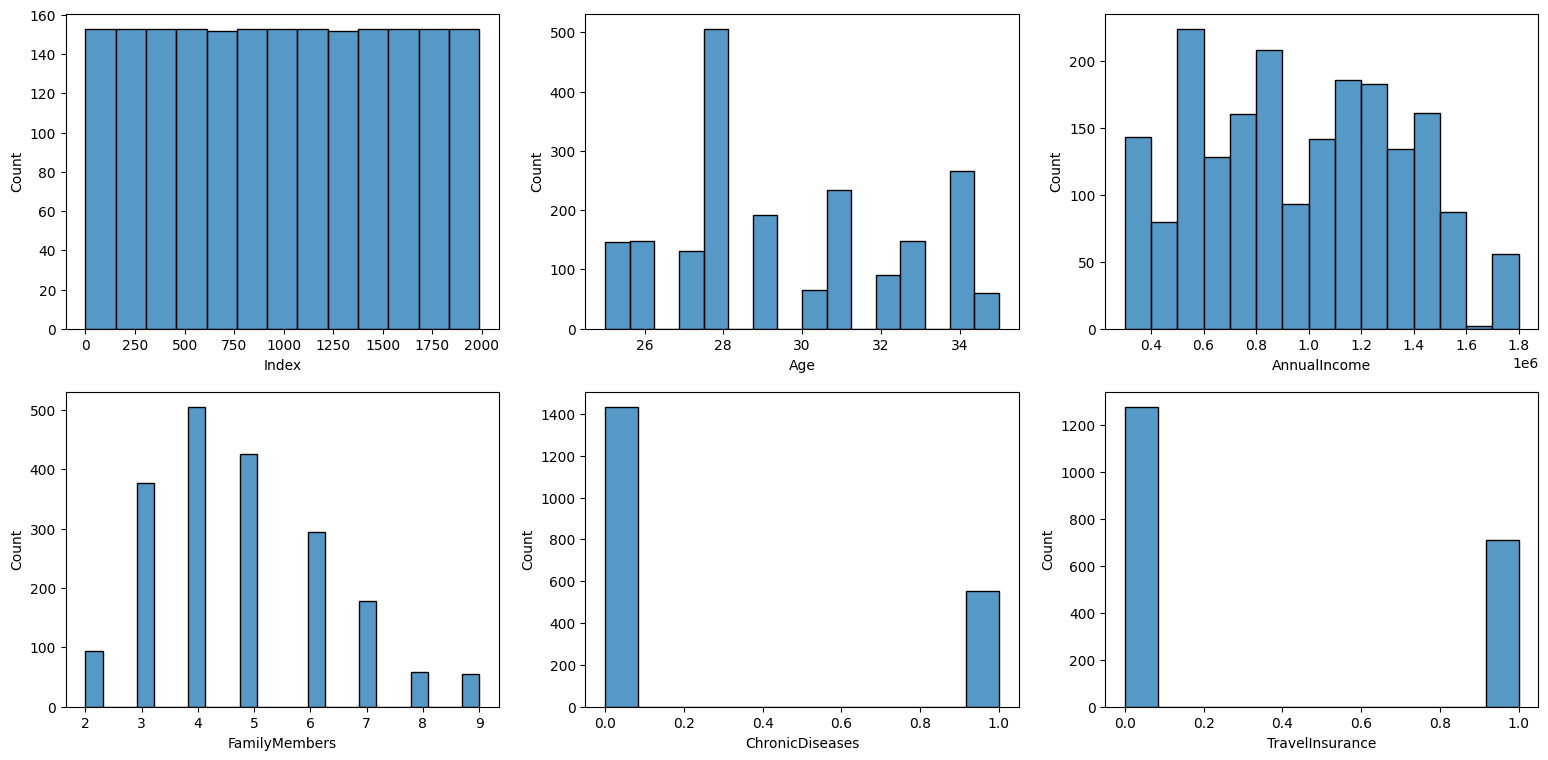

In [ ]:
plt.figure(figsize = (19, 9))
for i, num in enumerate(nums):

    plt.subplot(2,3, i+1)
    sns.histplot(df[num])

plt.show()

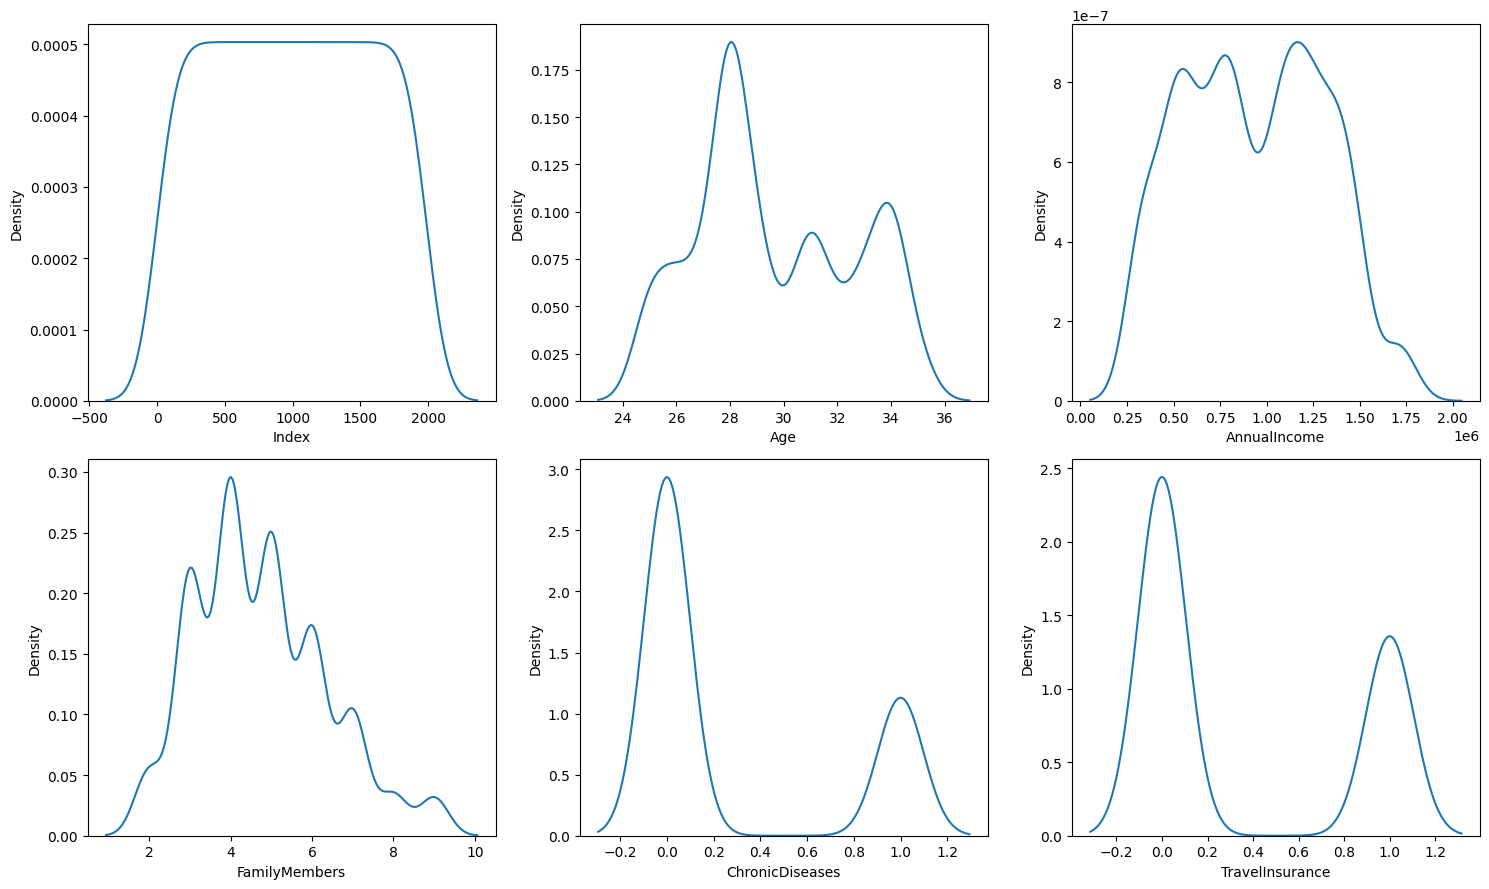

In [ ]:
features = nums
plt.figure(figsize = (15, 9))
for i in range(0, len(features)):
  plt.subplot(2,3, i+1)
  sns.kdeplot(x = df[features[i]])
  plt.xlabel(features[i])
plt.tight_layout()

Dapat dilihat dari plot diatas semuanya feature telah terdistribusi normal akan tetapi sesuai analisa di stage 1 sebelumnya dinyatakan bahwa : feature FamilyMembers dan Age, ada kemungkinan bahwa dua feature ini slightly positively skewed. maka perlu dilakukan analisa lebih lanjut. dan kami disini mencoba untuk trial log transformation dapat dilihat di penjelasan dibawah.

<Axes: xlabel='Age', ylabel='Density'>

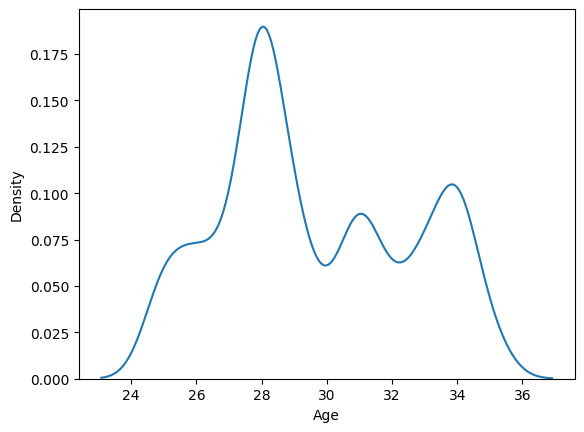

In [ ]:
#Sebelum dilakukan Log Transformation
sns.kdeplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

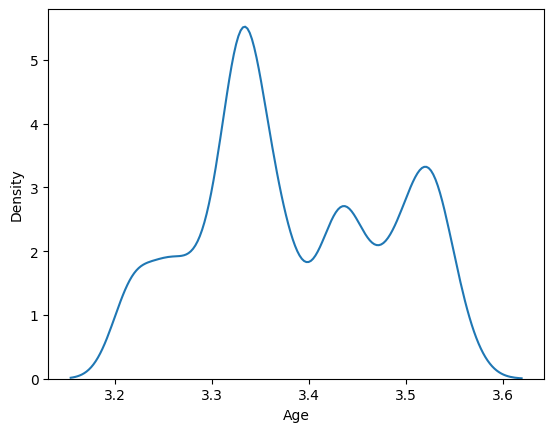

In [ ]:
#Setelah dilakukan log transformation
sns.kdeplot(np.log(df['Age']))

<Axes: xlabel='FamilyMembers', ylabel='Density'>

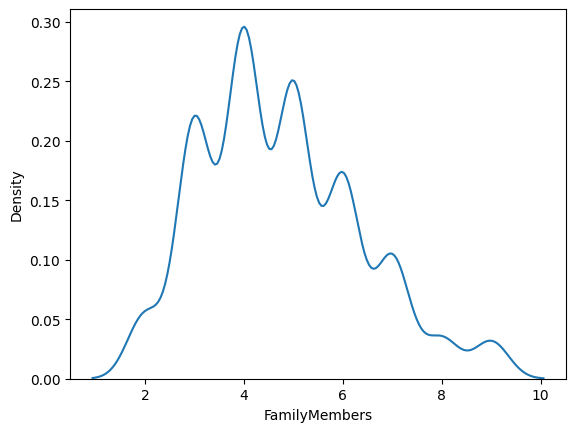

In [ ]:
#Sebelum dilakukan Log Transformation
sns.kdeplot(df['FamilyMembers'])

<Axes: xlabel='FamilyMembers', ylabel='Density'>

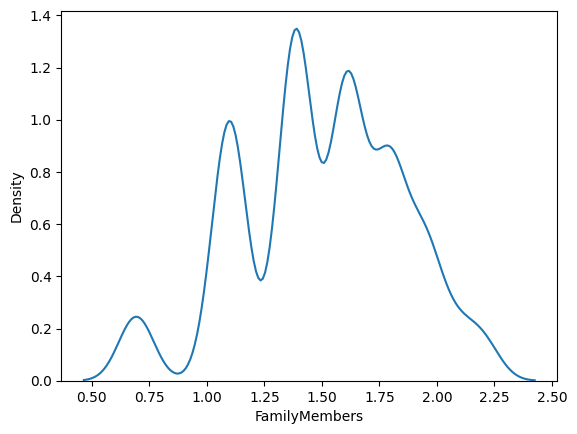

In [ ]:
#Setelah dilakukan log transformation
sns.kdeplot(np.log(df['FamilyMembers']))

Jadi hasil trial log transformation Feature Age dan FamilyMembers adalah :
- Transformasi tidak perlu dilakukan jika distribusi variabel memang sudah mendekati normal distribution
- Feature Age sudah terdistribusi normal sebelumnya karena setalah di log pun hasilnya tetap sama
- Feature FamilyMembers sudah mendekati normal distribution

dapat dilihat kde plot diatas seteah melalukan log transformation

##### **Feature encoding**

In [ ]:
print('Employment Type')
print(df['Employment Type'].unique())
print('\n')
print('GraduateOrNot')
print(df['GraduateOrNot'].unique())
print('\n')
print('FrequentFlyer')
print(df['FrequentFlyer'].unique())
print('\n')
print('EverTravelledAbroad')
print(df['EverTravelledAbroad'].unique())

Employment Type
['Government Sector' 'Private Sector/Self Employed']


GraduateOrNot
['Yes' 'No']


FrequentFlyer
['No' 'Yes']


EverTravelledAbroad
['No' 'Yes']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(drop="first", sparse_output=False)
df['Employment Type'] = onehot.fit_transform(df['Employment Type'].values.reshape(-1, 1))

df.head(3)

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0.0,Yes,400000,6,1,No,No,0
1,1,31,1.0,Yes,1250000,7,0,No,No,0
2,2,34,1.0,Yes,500000,4,1,No,No,1


Penggunaan One-Hot Encoding (0, 1) dapat diterapkan pada klasifikasi, baik dalam regresi linier maupun jenis klasifikasi lainnya. Di samping itu, Label Encoding (1, 2) dapat dipertimbangkan untuk jenis klasifikasi lainnya.

Penggantian nilai teks dengan nilai numerik bertujuan untuk memudahkan pemrosesan data dan analisis machine learning.

In [ ]:
# Define a mapping dictionary
mapping = {'No': 0, 'Yes': 1}

# Replace values in the DataFrame using the mapping
df.replace(mapping, inplace=True)
df.sample(3)

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1235,1235,28,0.0,1,1200000,3,0,0,0,0
56,56,28,1.0,1,550000,3,0,0,0,1
1155,1155,28,0.0,1,600000,4,0,1,0,1


In [ ]:
# Categorizing AnnualIncome
bins = [0, 600000, 1250000, 1800000]
# 0-600.000 -> low / 600.001 - 1.250.000 -> med / 1.250.001 - 1.800.000 -> high
groupNames = ['low', 'med', 'high']
df['CatAnIncome'] = pd.cut(df['AnnualIncome'], bins, labels = groupNames, include_lowest = True)
df.tail(3)

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
1984,1984,28,1.0,1,1150000,6,1,0,0,0,med
1985,1985,34,1.0,1,1000000,6,0,1,1,1,med
1986,1986,34,1.0,1,500000,4,0,0,0,0,low


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'AnnualIncome'.
df['CatAnIncome']= label_encoder.fit_transform(df['CatAnIncome'])

df.tail(3)

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
1984,1984,28,1.0,1,1150000,6,1,0,0,0,2
1985,1985,34,1.0,1,1000000,6,0,1,1,1,2
1986,1986,34,1.0,1,500000,4,0,0,0,0,1


Terkait fitur Annual Income, perlu dipertimbangkan kembali apakah akan menggunakan data asli atau data yang telah dikategorikan pada proses sebelumnya untuk meningkatkan performansi model.

In [ ]:
df['TravelInsurance'] = df.pop('TravelInsurance')

<Axes: >

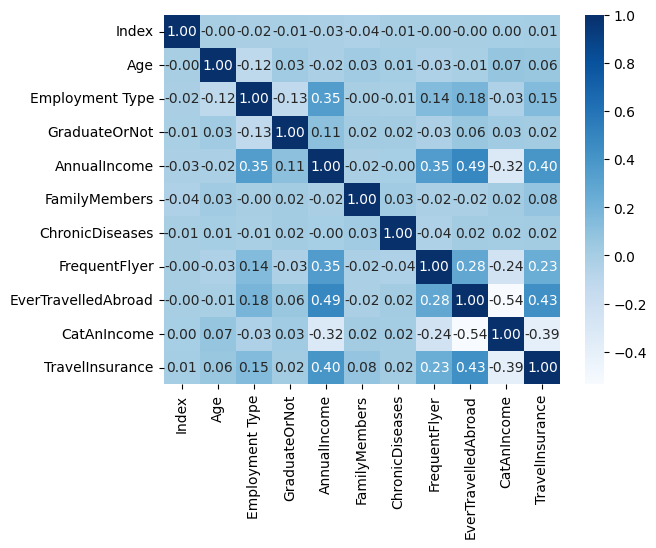

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(['TravelInsurance'], axis=1).columns
vif_data["VIF"] = [vif(df.drop(['TravelInsurance'], axis=1).values, i)
                    for i in range(len(df.drop(['TravelInsurance'], axis=1).columns))]
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
1,Age,24.592935
4,AnnualIncome,11.049536
5,FamilyMembers,9.232880
3,GraduateOrNot,6.921836
9,CatAnIncome,5.150951
2,Employment Type,4.081826
0,Index,3.887196
8,EverTravelledAbroad,2.087305
7,FrequentFlyer,1.493027
6,ChronicDiseases,1.389188


Fitur-fitur yang memiliki nilai VIF besar menunjukkan adanya multikolinearitas yang perlu dipertimbangkan.

##### **Handle class imbalance**

In [ ]:
X = df.drop(columns=["TravelInsurance"])
y = df.TravelInsurance

from imblearn.over_sampling import SMOTE

# Oversample data minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Print formatted comparison
print("Data Distribution Before Oversampling:")
print(f"  Total samples: {len(df)}")
print(f"  Count (TravelInsurance = 0): {y.value_counts()[0]}")
print(f"  Count (TravelInsurance = 1): {y.value_counts()[1]}")

print("Data Distribution After Oversampling:")
print(f"  Total samples: {len(X_resampled)}")
print(f"  Count (TravelInsurance = 0): {y_resampled.value_counts()[0]}")
print(f"  Count (TravelInsurance = 1): {y_resampled.value_counts()[1]}")

Data Distribution Before Oversampling:
  Total samples: 1987
  Count (TravelInsurance = 0): 1277
  Count (TravelInsurance = 1): 710
Data Distribution After Oversampling:
  Total samples: 2554
  Count (TravelInsurance = 0): 1277
  Count (TravelInsurance = 1): 1277


### **Feature Engineering**

In [ ]:
X_resampled = X_resampled.drop(columns=['Index', 'Age', 'GraduateOrNot', 'ChronicDiseases', 'AnnualIncome'])

Proses membuang fitur yang kurang relevan atau redundan, dengan memperhatikan korelasi, p-value dan multicollinearity menggunakan VIF

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_resampled.columns
vif_data["VIF"] = [vif(X_resampled, i)
                    for i in range(len(X_resampled.columns))]
vif_data

,feature,VIF
0,Employment Type,3.640771
1,FamilyMembers,5.000780
2,FrequentFlyer,1.426383
3,EverTravelledAbroad,1.953442
4,CatAnIncome,3.662856


##### **Feature Tambahan**

Feature tambahan yang mungkin akan membantu membuat performansi model semakin bagus anatara lain adalah Jenis Kelamin, Tipe Perjalanan, Tujuan, Durasi Perjalanan. Fitur-fitur tambahan di atas dapat membantu model untuk lebih memahami profil risiko individu dan memberikan prediksi yang lebih akurat.

-

-

-

-

Kode di bawah ini bertujuan untuk mendemonstrasikan salah satu metode machine learning dengan data yang sudah ada dan tidak termasuk dalam langkah-langkah Stage 2 Final Project.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2043, 5), (511, 5), (2043,), (511,))

In [ ]:
# Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.4f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.4f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.4f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.4f" % f1_score(y_test, y_pred))

    print("ROC AUC (Test-proba): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train-proba): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
eval_classification(lr)

Accuracy (Test Set): 0.6947
Precision (Test Set): 0.7717
Recall (Test Set): 0.5547
F1-Score (Test Set): 0.6455
ROC AUC (Test-proba): 0.7068
ROC AUC (Train-proba): 0.7029
